In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import statsmodels.api as sm

In [2]:
# Do employers provide enough mental health information in the tech industry?

In [4]:
# Reads all-ages.cvs into a dataframe and prints the dataframe.
df1 = pd.read_csv ('mental_health_tech_2014.csv')
df1.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
# Tidying the data and getting rid of unimportant rows and columns

# Getting rid of unimportant rows
df1 = df1[df1['self_employed'] == 'No']
df1 = df1[df1['Country'] == 'United States']

# Getting rid of unimportant columns
df1.drop('comments', inplace=True, axis=1)
df1.drop('phys_health_interview', inplace=True, axis=1)
df1.drop('mental_health_interview', inplace=True, axis=1)
df1.drop('state', inplace=True, axis=1)
df1.drop('self_employed', inplace=True, axis=1)
df1.drop('Timestamp', inplace=True, axis=1)
df1.drop('Country', inplace=True, axis=1)

In [6]:
# Checks for NaNs in our dataframe.
is_NaN = df1.isnull()
rows_with_NaN = df1[is_NaN.any(axis=1)]
print(rows_with_NaN.count)

<bound method DataFrame.count of       Age  Gender family_history treatment work_interfere    no_employees  \
26     33    male             No        No            NaN             1-5   
38     50    male             No        No            NaN         100-500   
41     35    male             No        No            NaN  More than 1000   
47     34    male             No        No            NaN            6-25   
51     33    male             No        No            NaN         100-500   
...   ...     ...            ...       ...            ...             ...   
1129   28    male             No        No            NaN  More than 1000   
1170   29    male             No        No            NaN  More than 1000   
1171   30    male             No        No            NaN  More than 1000   
1175   38    male            Yes        No            NaN            6-25   
1257   46  female             No        No            NaN         100-500   

     remote_work tech_company    benefits 

In [7]:
# Gives dummies for the the categorical responses 
df1['Gender'] = df1['Gender'].map(
                  {'Male':0, 'male': 0, 'm': 0, 'M': 0, 'f': 1, 'F':1, 'female': 1,'Female':1, 'Other': 2, 'other': 2})
df1['family_history'] = df1['family_history'].map(
                  {'No':0, 'Yes': 1})
df1['treatment'] = df1['treatment'].map(
                  {'No':0, 'Yes': 1})
df1['remote_work'] = df1['remote_work'].map(
                  {'No':0, 'Yes': 1})
df1['tech_company'] = df1['tech_company'].map(
                  {'No':0, 'Yes': 1})
df1['benefits'] = df1['benefits'].map(
                  {'No':0, 'Yes': 1, 'Don\'t know': 2})
df1['care_options'] = df1['care_options'].map(
                  {'No':0, 'Yes': 1, 'Not sure': 2})
df1['wellness_program'] = df1['wellness_program'].map(
                  {'No':0, 'Yes': 1, 'Don\'t know': 2})
df1['seek_help'] = df1['seek_help'].map(
                  {'No':0, 'Yes': 1, 'Don\'t know': 2})
df1['anonymity'] = df1['anonymity'].map(
                  {'No':0, 'Yes': 1, 'Don\'t know': 2})
df1['leave'] = df1['leave'].map(
                  {'Very easy':0, 'Somewhat easy': 1, 'Somewhat difficult': 2, "Very difficult": 3, 'Don\'t know': 0})
df1['mental_health_consequence'] = df1['mental_health_consequence'].map(
                  {'No':0, 'Yes': 1, 'Maybe': 2})
df1['phys_health_consequence'] = df1['phys_health_consequence'].map(
                  {'No':0, 'Yes': 1, 'Maybe': 2})
df1['coworkers'] = df1['coworkers'].map(
                  {'No':0, 'Yes': 1, 'Some of them': 2})
df1['supervisor'] = df1['supervisor'].map(
                  {'No':0, 'Yes': 1, 'Some of them': 2})
df1['mental_vs_physical'] = df1['mental_vs_physical'].map(
                  {'No':0, 'Yes': 1, 'Don\'t know': 2})
df1['obs_consequence'] = df1['obs_consequence'].map(
                  {'No':0, 'Yes': 1})
df1['work_interfere'] = df1['work_interfere'].fillna(value = 'NA')
df1['work_interfere'] = df1['work_interfere'].map(
                  {'Often':0,'Sometimes': 1, 'Rarely': 2, 'Never':3, 'NA': 4})

# Creating a column that tells us whether or not the person has a mental health condition
df1['Mental_Health'] = np.where(df1['work_interfere'] == 4, 0, 1)

In [8]:
df1.head(20)

,Age,Gender,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence,Mental_Health
20,29,0,1,1,1,100-500,0,1,1,1,...,0,0,2,2,0,2,2,0,0,1
22,46,0,0,1,0,26-100,1,1,1,1,...,0,2,0,2,0,2,1,0,0,1
23,41,0,0,1,3,More than 1000,0,0,2,0,...,2,2,0,2,0,0,0,2,0,1
24,33,0,1,1,2,26-100,0,1,1,2,...,1,1,0,0,0,1,1,2,0,1
25,35,0,1,1,1,More than 1000,0,0,1,1,...,2,0,0,1,0,2,1,0,0,1
26,33,0,0,0,4,1-5,0,1,2,2,...,2,2,0,2,2,2,0,2,0,0
27,35,1,1,1,2,6-25,1,1,1,1,...,2,2,0,0,0,1,1,1,0,1
28,34,0,0,1,1,26-100,1,1,2,2,...,2,2,2,0,0,2,0,0,0,1
33,42,0,1,1,1,26-100,1,1,1,1,...,1,1,0,2,0,2,2,2,0,1
34,40,1,0,1,1,1-5,0,1,1,1,...,0,2,0,2,0,2,0,1,0,1


In [9]:
# Data Analysis and Vizualization

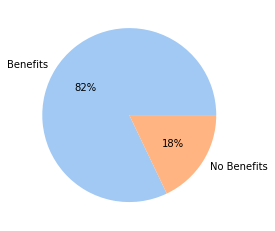

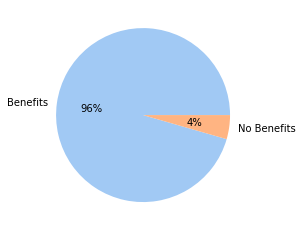

In [10]:
# Dataframe of people that have a mental health issue
dfMHealth = df1[df1['Mental_Health'] == 1].copy()

# Dataframe of people that do not have a mental health issue
dfNoMHealth = df1[df1['Mental_Health'] == 0].copy()

# Pie chart for those with mental health issues
numBenefits = len(dfMHealth[dfMHealth['benefits'] == 1])
numNBenefits = len(dfMHealth[dfMHealth['benefits'] == 0])
data = [numBenefits, numNBenefits]
labels = ['Benefits', 'No Benefits']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Pie chart for
numBenefits = len(dfMHealth[dfMHealth['benefits'] == 1])
numNBenefits = len(dfNoMHealth[dfNoMHealth['benefits'] == 0])
data = [numBenefits, numNBenefits]
labels = ['Benefits', 'No Benefits']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

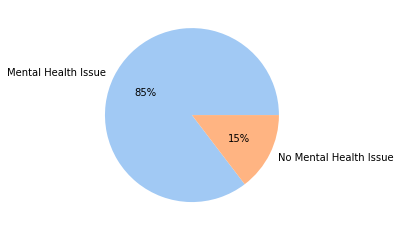

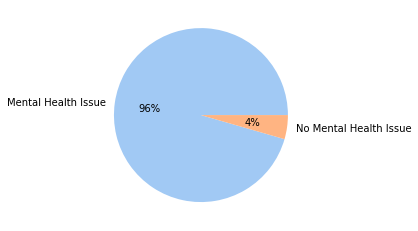

In [13]:
# Dataframe of people that have a mental health issue
dfMHealth = df1[df1['benefits'] == 1].copy()

# Dataframe of people that do not have a mental health issue
dfNoMHealth = df1[df1['benefits'] == 0].copy()

# Pie chart for those with mental health issues
numBenefits = len(dfMHealth[dfMHealth['Mental_Health'] == 1])
numNBenefits = len(dfMHealth[dfMHealth['Mental_Health'] == 0])
data = [numBenefits, numNBenefits]
labels = ['Mental Health Issue', 'No Mental Health Issue']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Pie chart for
numBenefits = len(dfMHealth[dfMHealth['Mental_Health'] == 1])
numNBenefits = len(dfNoMHealth[dfNoMHealth['Mental_Health'] == 0])
data = [numBenefits, numNBenefits]
labels = ['Mental Health Issue', 'No Mental Health Issue']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [14]:
# Take the average
tempDf = dfNoMHealth[dfNoMHealth['work_interfere'] != 4]
tempDf['work_interfere'].mean()
print(tempDf['work_interfere'].mean())

1.2857142857142858


In [15]:
# Checks for NaNs in our dataframe.
is_NaN = df1.isnull()
rows_with_NaN = df1[is_NaN.any(axis=1)]
print(rows_with_NaN.count)

<bound method DataFrame.count of Empty DataFrame
Columns: [Age, Gender, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_vs_physical, obs_consequence, Mental_Health]
Index: []

[0 rows x 21 columns]>


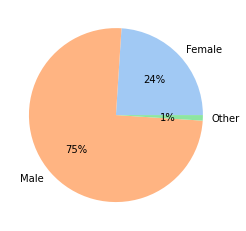

In [16]:
numFemales = len(df1[df1['Gender'] == 1])
numMales = len(df1[df1['Gender'] == 0])
numOther = len(df1[df1['Gender'] == 2])
data = [numFemales, numMales, numOther]
labels = ['Female', 'Male', 'Other']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
# Logistic Regression

In [ ]:
df1.to_csv('modified_data_2014.csv', index=False, encoding='utf-8')